### Loading MNIST database with Keras using Tensorflow:

In [1]:
%pylab inline

# input image dimensions
img_rows, img_cols = 28, 28
#
# # Uncomment the following lines if you have keras installed. Otherwise you can 
# # use the file I uploaded: mnist.npz
import keras
from keras.datasets import mnist
from keras import backend as K
#
#
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)
    input_shape = (img_rows, img_cols)
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

np.savez_compressed('mnist.npz', x_train, y_train, x_test, y_test)

#arc = load('mnist.npz')

#x_train = arc['arr_0']
#y_train = arc['arr_1']
#x_test  = arc['arr_2']
#y_test  = arc['arr_3']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Plotting image from x_train:

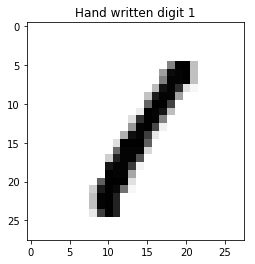

In [2]:
#import matplotlib.pyplot as plot
#import math

# Show image number 3, and write in the title what digit it should correspond to
N=3
imshow(x_train[N], cmap='gray_r')
_ = title('Hand written digit '+str(y_train[N]))

### Plotting image from x_test:

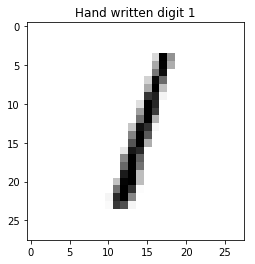

In [3]:
N=2
imshow(x_test[N], cmap='gray_r')
#colorbar()
_ = title('Hand written digit '+str(y_test[N]))

### My laptop configuration:

In [4]:
#import os
#os.system("lspcu")
!lscpu
##!lshw -class cpu

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                4
On-line CPU(s) list:   0-3
Thread(s) per core:    2
Core(s) per socket:    2
Socket(s):             1
NUMA node(s):          1
Vendor ID:             GenuineIntel
CPU family:            6
Model:                 42
Model name:            Intel(R) Core(TM) i5-2450M CPU @ 2.50GHz
Stepping:              7
CPU MHz:               1087.593
CPU max MHz:           3100.0000
CPU min MHz:           800.0000
BogoMIPS:              4989.12
Virtualization:        VT-x
L1d cache:             32K
L1i cache:             32K
L2 cache:              256K
L3 cache:              3072K
NUMA node0 CPU(s):     0-3
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx rdtscp lm constant_tsc arch_perfmon pebs bts nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor d

In [5]:
!lshw -class memory

  *-memory                
       description: System memory
       physical id: 0
       size: 15GiB


## Assignment 1

### Defining distance functions:

In [6]:
##Assignment 1
#Functions:

#Naive
def d_infty(x,z):
    dist0 = 0
    for i in range(28):
        for j in range(28):
            temp = abs(z[i,j]-x[i,j])
            if temp > dist0:
                dist0 = temp
    return dist0
def d_one(x,z):
    dist1 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist1 += abs(temp)
    return dist1
def d_two(x,z):
    dist2 = 0
    for i in range(28):
        for j in range(28):
            temp = z[i,j]-x[i,j]
            dist2 += temp*temp
    return math.sqrt(dist2)

#Optimized
def opt_d_infty(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return dd.max()
def opt_d_one(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    return np.sum(dd)
def opt_d_two(x,z):
    xx = np.array(x)
    zz = np.array(z)
    dd = abs(np.subtract(xx,zz))
    dd2 = dd*dd
    return np.sqrt(np.sum(dd2))

### Testing and timing functions:

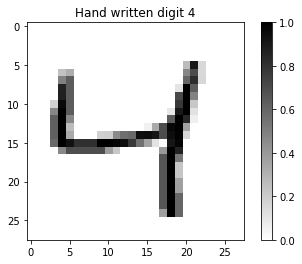

In [7]:
#### Using x_train[N=2] AND x_test[N=2] for testing and timing

N=2
imshow(x_train[N], cmap='gray_r')
colorbar()
_ = title('Hand written digit '+str(y_train[N]))

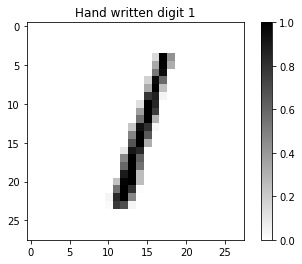

In [8]:
imshow(x_test[N], cmap='gray_r')
colorbar()
_ = title('Hand written digit '+str(y_test[N]))

In [9]:
print("Checking and Timing d_infty():\n")
print ("Naïve distance x_train[2] to itself:", d_infty(x_train[2],x_train[2]))
%timeit d_infty(x_train[2],x_train[2])
print ("\n")
print ("Naïve distance x_train[2] to x_test[2]:",d_infty(x_train[2],x_test[2]))
%timeit d_infty(x_train[2],x_test[2])
print ("\n")
print ("Opt. distance x_train[2] to itself:",opt_d_infty(x_train[2],x_train[2]))
%timeit opt_d_infty(x_train[2],x_train[2])
print ("\n")
print ("Opt. distance x_train[2] to x_test[2]:", opt_d_infty(x_train[2],x_test[2]))
%timeit opt_d_infty(x_train[2],x_test[2])

Checking and Timing d_infty():

Naïve distance x_train[2] to itself: 0
3.09 ms ± 17.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Naïve distance x_train[2] to x_test[2]: 1.0
923 µs ± 36.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Opt. distance x_train[2] to itself: 0.0
15.8 µs ± 1.84 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Opt. distance x_train[2] to x_test[2]: 1.0
15.2 µs ± 313 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [56]:
print("Checking and Timing d_one():\n")
print ("Naïve distance x_train[2] to itself:", d_one(x_train[2],x_train[2]))
%timeit d_one(x_train[2],x_train[2])
print ("\n")
naive = d_one(x_train[2],x_test[2])
print ("Naïve distance x_train[2] to x_test[2]:",naive)
%timeit d_one(x_train[2],x_test[2])
print ("\n")
print ("Opt. distance x_train[2] to itself:",opt_d_one(x_train[2],x_train[2]))
%timeit opt_d_one(x_train[2],x_train[2])
print ("\n")
opt = opt_d_one(x_train[2],x_test[2])
print ("Opt. distance x_train[2] to x_test[2]:", opt)
%timeit opt_d_one(x_train[2],x_test[2])
error_one = (abs(naive-opt)/naive)*100
trunc_error_one = '%.3e'%(error_one)
print ("\nError (due to numpy float32 standart): ",trunc_error_one, "%")

Checking and Timing d_one():

Naïve distance x_train[2] to itself: 0.0
548 µs ± 26.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Naïve distance x_train[2] to x_test[2]: 107.5294131655246
553 µs ± 55.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Opt. distance x_train[2] to itself: 0.0
16.8 µs ± 65 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Opt. distance x_train[2] to x_test[2]: 107.52942
17.1 µs ± 358 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)

Error (due to numpy float32 standart):  5.375e-06 %


In [ ]:
#Checking and Timing d_two()

naive = d_two(x_train[2],x_test[2])
print (naive)
opt = opt_d_two(x_train[2],x_test[2])
print (opt)
print ("relative error: ",(abs(naive-opt)/naive)*100,"%")

%timeit opt_d_two(x_train[2],x_test[2])
%timeit opt_d_two(x_train[2],x_train[2])
%timeit d_two(x_train[2],x_test[2])
%timeit d_two(x_train[2],x_train[2])

In [ ]:
def func_dist(d,x,z):
    result = d(x,z)
    return result

In [ ]:
#%timeit func_dist(d_one,x_train[2],x_test[2])

In [ ]:
#$Assignment 2

#import numpy as np
def func_dist(N,d,x,z):
    D = np.zeros((N,N)) 
    for i in range(N):
        for j in range(i+1):
            #print(j,i)
            D[i,j] = d(x[i],z[j])
            if i!=j: D[j,i]=D[i,j]
    return D

In [ ]:
func_dist(4, opt_d_one, x_train, x_test)

In [ ]:
D4 = func_dist(4, d_infty, x_train, x_train)
D4opt = func_dist(4, opt_d_infty, x_train, x_train)
print(D4)
print(D4opt)

In [ ]:
D4one = func_dist(4, d_one, x_train, x_train)
D4optone = func_dist(4, opt_d_one, x_train, x_train)
print(D4one)
print(D4optone)

In [ ]:
#%timeit func_dist(1000,opt_d_infty,x_train,x_train)
#%timeit func_dist(1000,opt_d_one,x_train,x_train)
#%timeit func_dist(1000,opt_d_two,x_train,x_train)

In [ ]:
#Assingment 3
N = 100
Dinfty = func_dist(N,opt_d_infty,x_train,x_train)
imshow(Dinfty, cmap='jet')
colorbar()
_ = title('Distance Matrix Dinfty')

In [ ]:
N = 100 
D1one = func_dist(N,opt_d_one,x_train,x_train)
imshow(D1one, cmap='jet')
colorbar()
_ = title('Distance Matrix D1one')

In [ ]:
N = 100 
D2two = func_dist(N,opt_d_two,x_train,x_train)
imshow(D2two, cmap='jet')
colorbar()
_ = title('Distance Matrix D2two')

In [ ]:
##Assignment 4

def efficency(D,N,Y):

    error_counter = 0
    for i in range(N):
        D[i,i]=D[i,N-1]
    for i in range(N-1):
        A = np.array(D[i])
        a_val = A.min()
        a = A.argmin()
        if Y[a]!=Y[i]:
            error_counter += 1
  
    return error_counter/N
            

In [ ]:
#Assignment 5

E = np.zeros((3))
i=0
for k in 100, 200:#, 400, 800, 1600:
    D0 = func_dist(k,opt_d_infty,x_train,x_train)
    E[0] = efficency(D0, k, y_train)
    D1 = func_dist(k,opt_d_one,x_train,x_train)
    E[1] = efficency(D1, k, y_train)
    D2 = func_dist(k,opt_d_two,x_train,x_train)
    E[2] = efficency(D2, k, y_train)
    print (E)

In [ ]:
#Assignment 6

In [ ]:
#Assignment 7

In [ ]:
##Assignment 8

In [ ]:
import sklearn.neighbors as sklN

In [ ]:
#X_train = np.ndarray(x_train[:10],dtype=float32)
#%timeit tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_two)
#%timeit treee = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')              

#tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')
#val, idx = tree.query(x_test[:N].reshape(N,28*28), k=2)
#print(k)
#print(val)

In [ ]:
#N=10
#tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric=opt_d_two)
#val, idx = tree.query(x_test[:N].reshape(N,28*28),k=4)
#print(idx)
#print(val)

In [ ]:
#tree2 = sklN.BallTree(x_train[:2000].reshape(2000,28*28),metric=opt_d_one)
#dist, ind = tree2.query(x_train[:1000].reshape(1000,28*28), k=900)
#tree1 = sklN.BallTree(x_train[:2000].reshape(2000,28*28),metric='manhattan')  
#distt, indd = tree1.query(x_train[:1000].reshape(1000,28*28), k=900)
#print(np.array_equal(ind,indd))
#print(np.array_equal(dist,distt))

In [ ]:
def efficency_of_test(N):
    tree = sklN.BallTree(x_train[:N].reshape(N,28*28),metric='euclidean')
    val, idx = tree.query(x_test[:10000].reshape(10000,28*28),k=1)
    #print(idx)
    error_counter=0
    for i in range(10000):
        if y_train[idx[i]]!=y_test[i]: error_counter+=1
#print(i, idx[i], y_train[idx[i]])
#print(i, y_test[i])
    return (N, error_counter/len(x_test))   

In [ ]:
NN=[100,200,300,400,500]
list_eff=[efficency_of_test(n) for n in NN]
#    eff.append(efficency_of_test(n))
#    print(eff)

In [ ]:
print(list_eff)
x_eff = [l[0] for l in list_eff]
y_eff = [l[1] for l in list_eff]
print(x_eff)
print(y_eff)

#import matplotlib.pyplot as plt
plot.plot(x_eff,y_eff)
plot.plot(x_eff,y_eff, 'or')
plot.show()

In [ ]:
NNN=[3200, 6400, 12800, 25600, 51200]
list_eff2=[efficency_of_test(n) for n in NNN]

In [ ]:
print(list_eff2)
x_eff2 = [l[0] for l in list_eff2]
y_eff2 = [l[1] for l in list_eff2]
print(x_eff2)
print(y_eff2)

#import matplotlib.pyplot as plt
plot.xscale('log')
plot.plot(x_eff2,y_eff2)
plot.plot(x_eff2,y_eff2, 'or')
plot.show()